In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
d = pd.read_csv("GF178_N_18_Raw.csv") # header None 을 안해서,, 

In [3]:
c = pd.read_csv("GF178_N_20_Filtered.csv")

In [4]:
%pylab inline
def want_fig_20(data):
    gr = data.plot(kind = "line", figsize = (20,4))
    gr.xticks(data == 1)
    return gr

Populating the interactive namespace from numpy and matplotlib


AttributeError: 'AxesSubplot' object has no attribute 'xticks'

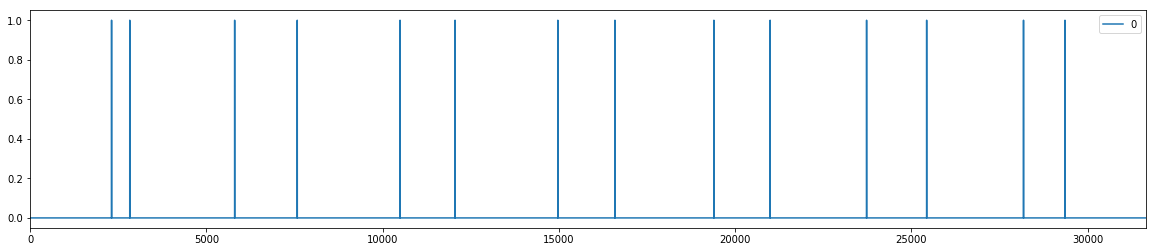

In [5]:
want_fig_20(c)

In [6]:
check = c.iloc[:,0]
for i in enumerate(check):
    if i[1] == 1:
        print(i[0])

2312
2828
5804
7580
10496
12056
14972
16592
19400
20996
23732
25436
28184
29360


In [7]:
checkList = []
for i in enumerate(check):
    if i[1] ==1:
        checkList.append(i[0])
print(checkList)

[2312, 2828, 5804, 7580, 10496, 12056, 14972, 16592, 19400, 20996, 23732, 25436, 28184, 29360]


In [8]:
#Remove the very first and the last
checkList[1:-1]

[2828,
 5804,
 7580,
 10496,
 12056,
 14972,
 16592,
 19400,
 20996,
 23732,
 25436,
 28184]

In [9]:
# Let's partition the data into 1-Walking and 1-Truning
# Just randomly pick: 7580~12056
d.head(3)



,175,10,138,278,188,-218,-16,7,-9
0,177,11,140,246,-146,-158,-16,7,-9
1,173,11,139,344,-20,-40,-16,7,-9
2,175,11,135,2,30,-56,-16,7,-9


In [93]:
def get_three_acc(df):
    cut_df = df.iloc[:, 0:3]
    return cut_df

In [94]:
d_acc = get_three_acc(d)



In [95]:
type(d_acc)

pandas.core.frame.DataFrame

In [96]:
d_acc_part = d_acc.iloc[7580:12056,:]

In [97]:
def want_fig(data):
    gr = data.plot(kind = "line", figsize = (20,4))
    return gr

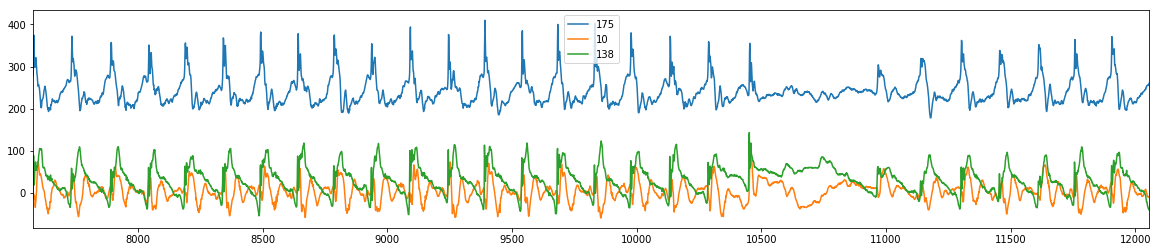

In [98]:
want_fig(d_acc_part) # w/o the D

In [99]:
d_acc_part

,175,10,138
7580,278,4,0
7581,294,3,60
7582,326,-5,88
7583,374,-15,50
7584,374,-13,18
7585,322,-6,21
7586,305,-11,33
7587,298,-15,55
7588,315,-27,60
7589,319,-35,68


In [100]:
# With the Disease (expect to see some diff in walking patterns btw the two)

In [101]:
d2 = pd.read_csv("GF313_N_18_Raw.csv")
c2 = pd.read_csv("GF313_N_20_Filtered.csv")

In [102]:
check2 = c2.iloc[:,0]
for i in enumerate(check2):
    if i[1] == 1:
        print(i[0])

2038
2410
4522
5722
7774
8842
10738
11818
13726
15106
16930
17938
19786
20794


In [103]:
check2List = []
for i in enumerate(check2):
    if i[1] ==1:
        check2List.append(i[0])
print(check2List)

[2038, 2410, 4522, 5722, 7774, 8842, 10738, 11818, 13726, 15106, 16930, 17938, 19786, 20794]


In [104]:
check2List[1:-1]

[2410, 4522, 5722, 7774, 8842, 10738, 11818, 13726, 15106, 16930, 17938, 19786]

In [105]:
#random pick 5722:8842

In [106]:
d2_acc = get_three_acc(d2)
d2_acc_part = d2_acc.iloc[5722:8842,:]

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

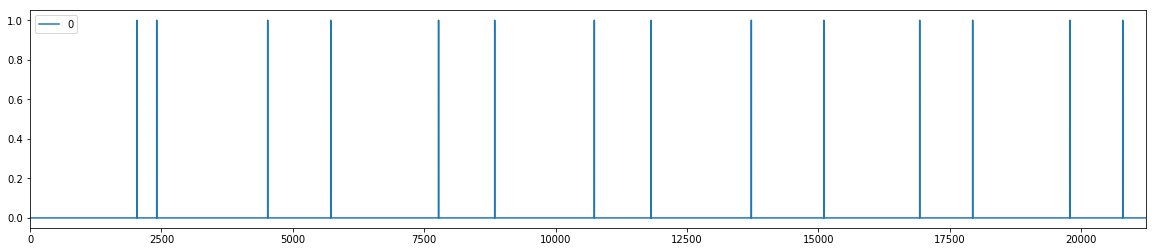

In [107]:
want_fig_20(c2)

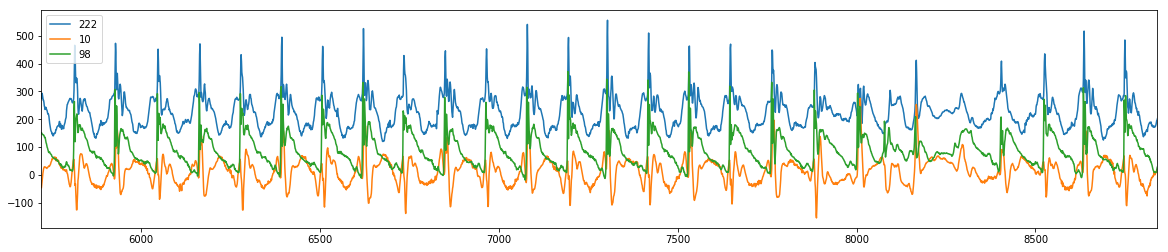

In [108]:
want_fig(d2_acc_part) # with D

In [109]:
print("# of d: ", len(d_acc_part), " and # of d2: ",len(d2_acc_part))

# of d:  4476  and # of d2:  3120


In [110]:
# 이렇게 length diff - > justify RNN ,, hopefully
# Roughly, fix to 3000 units
d_nor = d_acc_part.iloc[1:3001, :]
#len(d1)

In [111]:
d_abn = d2_acc_part.iloc[1:3001,:]

In [112]:
d_nor.head(2)

,175,10,138
7581,294,3,60
7582,326,-5,88


In [113]:
d_abn.head(2)

,222,10,98
5723,293,-33,150
5724,293,-23,146


In [114]:
class1_sample = np.array(d_nor).T

In [115]:
class1_sample[0,:].min()

185

In [116]:
class1_sample[1,:]

array([  3,  -5, -15, ...,  29,  28,  29], dtype=int64)

In [117]:
class1_sample[2,:]

array([60, 88, 50, ..., 40, 38, 37], dtype=int64)

In [118]:
print(class1_sample)

[[294 326 374 ..., 231 231 232]
 [  3  -5 -15 ...,  29  28  29]
 [ 60  88  50 ...,  40  38  37]]


In [119]:
class2_sample = np.array(d_abn).T

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "uppeer right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


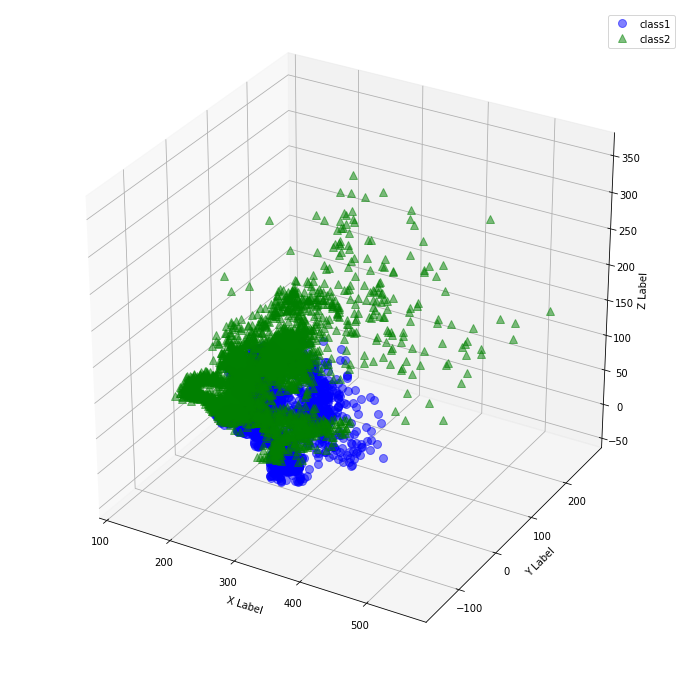

In [120]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# figure, width and height
fig = plt.figure(figsize = (12,12))
#3d suiubplot
#these are subplot grid parameters encoded as a single integer 1 x 1 grid, 1st subplot
ax = fig.add_subplot(111,projection = '3d')
#fontsize
#plt.reParams['legend.fontsize']  = 10

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#plt.show()

#plot samples
ax.plot(class1_sample[0,:],class1_sample[1,:], class1_sample[2,:],
        'o',markersize=8, color='blue',alpha=0.5,label='class1')
ax.plot(class2_sample[0,:],class2_sample[1,:],class2_sample[2,:],
       '^',markersize=8,alpha=0.5,color='green',label='class2')
ax.legend(loc='uppeer right')
plt.show()

In [121]:
all_samples = np.concatenate((class1_sample, class2_sample), axis = 1)

In [122]:
all_samples

array([[294, 326, 374, ..., 193, 198, 195],
       [  3,  -5, -15, ...,   2,  11,  -9],
       [ 60,  88,  50, ...,  23,  22,  26]], dtype=int64)

In [123]:
all_samples.T

array([[294,   3,  60],
       [326,  -5,  88],
       [374, -15,  50],
       ..., 
       [193,   2,  23],
       [198,  11,  22],
       [195,  -9,  26]], dtype=int64)

In [124]:
# step 4 - compute the dimensional mean vector, it will help compute the covariance mat
#mean for each feature
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

#3d mean vector
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print(mean_vector)

[[ 235.72883333]
 [   8.05966667]
 [  59.433     ]]


In [125]:
# step5 - compute covariance matrix
cov_mat = np.zeros((3,3))

for i in range((all_samples.shape[1])):
    cov_mat += (all_samples[:,i].reshape(3,1)-mean_vector).dot((all_samples[:,i].reshape(3,1)-mean_vector).T)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 15023543.81183336    931778.07766667   3995953.49100001]
 [   931778.07766667   8800370.63933309   1367957.986     ]
 [  3995953.49100001   1367957.986       18110449.06600008]]


In [126]:
# step6 - compute eigenvectors and eigenvalues
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('values')
print(eig_val)
print('vectors')
print(eig_vec)

values
[ 21073877.41674557  12283326.34007925   8577159.76034171]
vectors
[[ 0.56040979  0.82486362  0.07443701]
 [ 0.13364508 -0.00136608 -0.99102832]
 [ 0.81736152 -0.56533011  0.11100453]]


In [127]:
# step 7 - create eigenpair from both and sort them
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

#visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

21073877.4167
12283326.3401
8577159.76034


In [128]:
# step 8 choose k eigenvectors
#stack arrays in sequence horizontally - hstack
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print(matrix_w)

[[ 0.56040979  0.82486362]
 [ 0.13364508 -0.00136608]
 [ 0.81736152 -0.56533011]]


In [129]:
# step 9 transform our data using this eigenpair
transformed = matrix_w.T.dot(all_samples)
print(transformed)

[[ 214.203105    253.95318031  248.45666158 ...,  127.22569473
   130.41318787  129.32850302]
 [ 208.58600069  219.16332221  280.25298122 ...,  146.19335481
   150.87070832  146.16211861]]


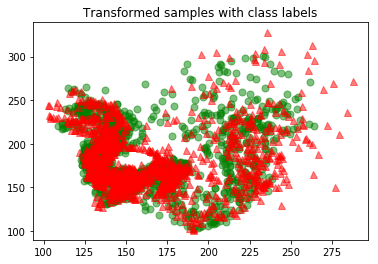

In [130]:
plt.plot(transformed[0,0:1500], transformed[1,0:1500],'o',markersize=7,color='green',alpha=0.5,label='class1')
plt.plot(transformed[0,1500:3000],transformed[1,1500:3000],'^',markersize=7,color='red',alpha=0.5,label='class2')
#plt.figure(figsize = (15,15))
#plt.xlim([-3000,3000])
#plt.ylim([-3000,3000])
#plt.xlabel('x_values')
#plt.ylabel('y_values')
#plt.legend()
plt.title('Transformed samples with class labels')
plt.show()

# of d:  4476  and # of d2:  3120


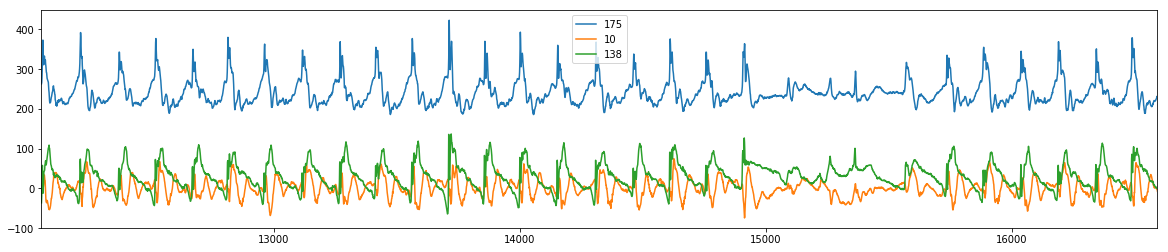

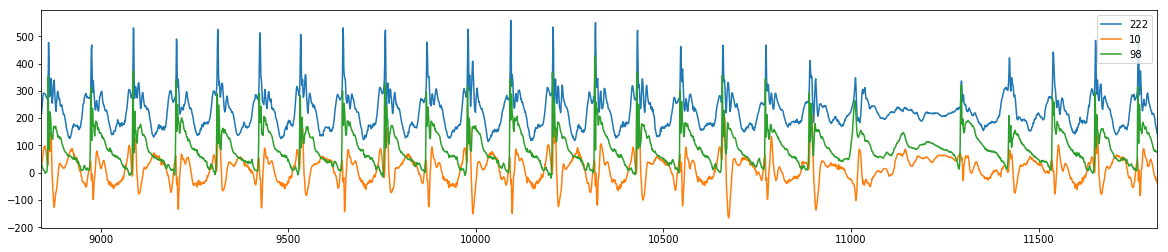

In [131]:
d_acc_part2 = d_acc.iloc[12056:16592,:]

d2_acc_part2 = d2_acc.iloc[8842:11818,:]
want_fig(d_acc_part2)
want_fig(d2_acc_part2)

print("# of d: ", len(d_acc_part), " and # of d2: ",len(d2_acc_part))


In [139]:
d_nor2 = d_acc_part2.iloc[1:3001, :]
d_abn2 = d2_acc_part2.iloc[1:3001,:]

In [140]:
class1_sample2 = np.array(d_nor2).T

In [141]:
class1_sample2

array([[266, 277, 296, ..., 233, 233, 234],
       [ -4,   2,  14, ...,   2,   2,   2],
       [-21,  10,  51, ...,  38,  37,  35]], dtype=int64)

In [142]:
class1_sample2[0,:].min()
class1_sample2[1,:]
class1_sample2[2,:]
print(class1_sample2)


[[266 277 296 ..., 233 233 234]
 [ -4   2  14 ...,   2   2   2]
 [-21  10  51 ...,  38  37  35]]


In [143]:
class2_sample2 = np.array(d_abn2).T

In [144]:
class2_sample2

array([[231, 244, 264, ..., 155, 143, 141],
       [ 33,  42,  61, ..., -31, -37, -30],
       [ 27,  23,  19, ...,  75,  79,  76]], dtype=int64)

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "uppeer right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


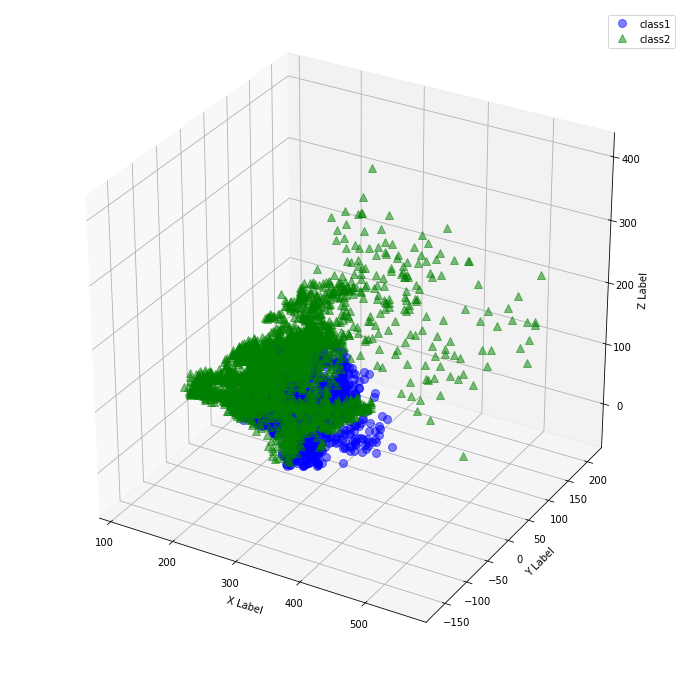

In [145]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# figure, width and height
fig = plt.figure(figsize = (12,12))
#3d suiubplot
#these are subplot grid parameters encoded as a single integer 1 x 1 grid, 1st subplot
ax = fig.add_subplot(111,projection = '3d')
#fontsize
#plt.reParams['legend.fontsize']  = 10

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.plot(class1_sample2[0,:],class1_sample2[1,:], class1_sample2[2,:],
        'o',markersize=8, color='blue',alpha=0.5,label='class1')
ax.plot(class2_sample2[0,:],class2_sample2[1,:],class2_sample2[2,:],
       '^',markersize=8,alpha=0.5,color='green',label='class2')
ax.legend(loc='uppeer right')
plt.show()

In [146]:
all_samples2 = np.concatenate((class1_sample2, class2_sample2), axis = 1)
all_samples2
all_samples2.T
# step 4 - compute the dimensional mean vector, it will help compute the covariance mat
#mean for each feature
mean_x = np.mean(all_samples2[0,:])
mean_y = np.mean(all_samples2[1,:])
mean_z = np.mean(all_samples2[2,:])

#3d mean vector
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print(mean_vector)

[[ 236.22661088]
 [   7.85355649]
 [  59.98443515]]


In [147]:
# step5 - compute covariance matrix
cov_mat = np.zeros((3,3))

for i in range((all_samples2.shape[1])):
    cov_mat += (all_samples2[:,i].reshape(3,1)-mean_vector).dot((all_samples2[:,i].reshape(3,1)-mean_vector).T)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 16724493.16887027    606806.28451883   4823820.07481172]
 [   606806.28451883   8979006.8619247    1029447.38075314]
 [  4823820.07481172   1029447.38075314  19845165.55246857]]


In [148]:
# step6 - compute eigenvectors and eigenvalues
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('values')
print(eig_val)
print('vectors')
print(eig_vec)

values
[ 23452486.81566392  13217947.40506173   8878231.36253789]
vectors
[[ 0.58559664  0.81015936  0.02680266]
 [ 0.08191154 -0.02624643 -0.99629394]
 [ 0.80645339 -0.58562184  0.08173123]]


In [149]:
# step 7 - create eigenpair from both and sort them
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

In [150]:
# sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

23452486.8157
13217947.4051
8878231.36254
[[ 0.58559664  0.81015936]
 [ 0.08191154 -0.02624643]
 [ 0.80645339 -0.58562184]]


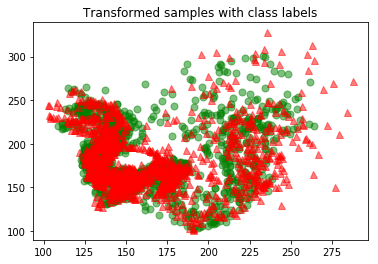

In [151]:
#visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])
    
# step 8 choose k eigenvectors
#stack arrays in sequence horizontally - hstack
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print(matrix_w)

plt.plot(transformed[0,0:1500], transformed[1,0:1500],'o',markersize=7,color='green',alpha=0.5,label='class1')
plt.plot(transformed[0,1500:3000],transformed[1,1500:3000],'^',markersize=7,color='red',alpha=0.5,label='class2')
#plt.figure(figsize = (15,15))
#plt.xlim([-3000,3000])
#plt.ylim([-3000,3000])
#plt.xlabel('x_values')
#plt.ylabel('y_values')
#plt.legend()
plt.title('Transformed samples with class labels')
plt.show()


In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components = 2)

In [60]:
X = np.concatenate((d_nor2, d_abn2))
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
nor = pca.fit(d_nor2)
print(pca.explained_variance_ratio_)  

[ 0.99506366  0.00340856]


In [65]:
abn = pca.fit(d_abn2)
print(pca.explained_variance_ratio_)  

[ 0.99791055  0.00131144]


In [ ]:
print(pca.explained_variance_ratio_)  

## 2018-01-02 Conclusion
### Each diff period has very similar pattern as we see on the graphs above.
### Hmmm... need to put more of the other data not been used...
### Need to preprocess the dataset as soooon as possible..........